<a href="https://colab.research.google.com/github/manuelapop/python_exercises/blob/main/quiz5psruuscript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is the practice quiz problem code

In [ ]:
import numpy as np
R = np.array([
  [ -10, -10, -10, -10, -10 ],
  [-10, 0, 50, 0, -10 ],
  [-10, 0, -100, 0, -10 ],
  [-10, 0, 0, 0, -10 ],
  [-10, 0, 0, 0, -10]])
dirs = [(-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0)]
gamma = 1

def value(h):
    result = np.zeros( (5,5) )
    if (h == 0):
        return result

    prev = R + gamma * value(h-1)

    def grab(x, y, dir):
        x2, y2 = x + dir[0], y + dir[1]
        return prev[x2][y2] if 0 <= x2 <= 4 and 0 <= y2 <= 4 else prev[x][y]

    for i in range(5):
        for j in range(5):
            result[i][j] = max(
                0.6 * grab(i, j, dirs[d])
                + 0.2 * grab(i, j, dirs[(d+1)%8])
                + 0.2 * grab(i, j, dirs[d-1])
                for d in range(len(dirs)))
    return result

print(f"One-step\n{value(1)}\n")
print(f"Two-step\n{value(2)}\n")
print(f"Three-step\n{value(3)}\n")

One-step
[[-4. 28. 30. 28. -4.]
 [-2.  8. -2.  8. -2.]
 [ 0. 10. 30. 10.  0.]
 [ 0.  0.  0.  0.  0.]
 [-2.  0.  0.  0. -2.]]

Two-step
[[ 9.6 34.4 32.  34.4  9.6]
 [10.4 25.2 19.2 25.2 10.4]
 [ 7.6 16.4 32.  16.4  7.6]
 [ 4.   0.   2.   0.   4. ]
 [-2.   0.   0.   0.  -2. ]]

Three-step
[[20.08 50.96 51.6  50.96 20.08]
 [23.28 32.32 24.08 32.32 23.28]
 [18.48 32.96 51.6  32.96 18.48]
 [ 9.36  0.64  3.28  0.64  9.36]
 [-1.2   1.2   1.2   1.2  -1.2 ]]



In [1]:
import numpy as np
#question 14.4 problem in videos
# Grid is 3 rows x 4 columns (row 0 = top, col 0 = left)
# Rewards when ENTERING a state
R = np.array([
    [ 1.0,  0.0,   0.0, 0.0],   # top row
    [ 0.0,  0.0,   0.0,   0.0 ],   # middle row
    [ 0.0,  0.0,   50.0,   100.0 ]    # bottom row
])

# Actions: up, right, down, left
dirs = [(-1, 0),  # up
        ( 0, 1),  # right
        ( 1, 0),  # down
        ( 0,-1)]  # left

gamma = 1.0  # discount factor


def value(h):
    """
    Finite-horizon optimal value function V_h for this MDP.

    V_h(s) = max_a E[R(s') + gamma * V_{h-1}(s')]
    """
    if h == 0:
        return np.zeros_like(R, dtype=float)

    # prev[s] = R(s) + gamma * V_{h-1}(s)
    prev = R + gamma * value(h - 1)

    def grab(i, j, d):
        """Return prev at the next state after moving in direction d,
        or staying put if we would hit a wall."""
        ni, nj = i + d[0], j + d[1]
        if 0 <= ni < R.shape[0] and 0 <= nj < R.shape[1]:
            return prev[ni, nj]
        else:
            return prev[i, j]  # collide with wall → stay

    V = np.zeros_like(R, dtype=float)

    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            best = -np.inf
            for k in range(len(dirs)):
                main = dirs[k]
                left = dirs[(k - 1) % 4]   # 90° left of intended
                right = dirs[(k + 1) % 4]  # 90° right of intended

                q = (
                    0.8  * grab(i, j, main) +
                    0.1 * grab(i, j, left) +
                    0.1 * grab(i, j, right)
                )
                best = max(best, q)

            V[i, j] = best

    return V


# Examples: one-step and two-step horizons
print("One-step horizon V1:\n", value(1), "\n")
print("Two-step horizon V2:\n", value(2), "\n")
print("Two-step horizon V2:\n", value(3), "\n")


One-step horizon V1:
 [[ 0.9  0.8  0.   0. ]
 [ 0.8  0.  40.  80. ]
 [ 0.  40.  85.  95. ]] 

Two-step horizon V2:
 [[  1.79   1.6   32.08  64.  ]
 [  1.6   36.08 116.   168.  ]
 [ 32.08 112.   173.5  189.  ]] 

Two-step horizon V2:
 [[  2.671  32.351  99.36  144.008]
 [ 32.351 104.16  199.208 259.6  ]
 [ 92.968 193.608 265.15  282.45 ]] 



In [ ]:
import numpy as np

# ------------------------------
# Actions and movement
# this is the grodworld example
# ------------------------------
ACTIONS = ['U', 'D', 'L', 'R']
ACTION_SYMBOLS = {'U': '↑', 'D': '↓', 'L': '←', 'R': '→', 'T': 'T', '#': '#'}

def move(state, action, n_rows, n_cols, obstacles):
    """Move in the grid; if you hit a wall or obstacle, stay where you are."""
    r, c = state

    if action == 'U':
        nr, nc = r - 1, c
    elif action == 'D':
        nr, nc = r + 1, c
    elif action == 'L':
        nr, nc = r, c - 1
    elif action == 'R':
        nr, nc = r, c + 1
    else:
        raise ValueError("Unknown action")

    # Outside grid or into obstacle -> stay
    if not (0 <= nr < n_rows and 0 <= nc < n_cols):
        return (r, c)
    if (nr, nc) in obstacles:
        return (r, c)

    return (nr, nc)

def side_actions(a):
    """Sideways actions for stochastic slippage."""
    return ['L', 'R'] if a in ['U', 'D'] else ['U', 'D']


# ------------------------------
# Finite-horizon value iteration
# ------------------------------
def value_iteration_sequence(
    n_rows,
    n_cols,
    terminal_rewards,
    obstacles=None,
    H=5,
    p_intended=0.8,
    gamma=0.9,
    default_reward=0.0,
):
    """
    Compute V^0, V^1, ..., V^H on a grid (max 5x5).

    terminal_rewards: dict[(r,c) -> reward] for terminal states
    obstacles: set[(r,c)] of blocked cells (value fixed to 0, no entry)
    default_reward: state reward R(s) for non-terminal, non-obstacle states
                    (in this example, 0 everywhere except terminals)

    Update (for non-terminal, non-obstacle states):
        V_{k+1}(s) = R(s) + max_a sum_s' T(s,a,s') * gamma * V_k(s')
    Terminals:
        V_{k+1}(s_T) = R(s_T)
    Obstacles:
        V_{k+1}(s_obs) = 0  (never updated)
    """
    assert n_rows <= 5 and n_cols <= 5, "Grid must be at most 5x5."

    if obstacles is None:
        obstacles = set()

    terminals = set(terminal_rewards.keys())
    state_rewards = {
        (r, c): default_reward
        for r in range(n_rows)
        for c in range(n_cols)
    }
    state_rewards.update(terminal_rewards)  # terminals get their own rewards

    # V^0(s) = 0 for all s
    V = np.zeros((n_rows, n_cols), dtype=float)
    Vs = [V.copy()]

    p_side = (1.0 - p_intended) / 2.0

    for k in range(1, H + 1):
        V_prev = Vs[-1]
        V_new = V_prev.copy()

        for r in range(n_rows):
            for c in range(n_cols):
                s = (r, c)

                if s in obstacles:
                    # blocked cell stays 0 forever
                    V_new[r, c] = 0.0
                    continue

                if s in terminals:
                    # terminal states always equal their immediate reward
                    V_new[r, c] = terminal_rewards[s]
                    continue

                R_s = state_rewards[s]

                best = -float("inf")

                for a in ACTIONS:
                    s_int = move(s, a, n_rows, n_cols, obstacles)
                    left, right = side_actions(a)
                    s_left = move(s, left, n_rows, n_cols, obstacles)
                    s_right = move(s, right, n_rows, n_cols, obstacles)

                    exp_val = 0.0
                    for prob, s_next in [
                        (p_intended, s_int),
                        (p_side, s_left),
                        (p_side, s_right),
                    ]:
                        exp_val += prob * (gamma * V_prev[s_next])

                    q_val = R_s + exp_val
                    if q_val > best:
                        best = q_val

                V_new[r, c] = best

        Vs.append(V_new.copy())

    return Vs


# ------------------------------
# Greedy policy from V
# ------------------------------
def get_policy(
    V,
    n_rows,
    n_cols,
    terminal_rewards,
    obstacles=None,
    p_intended=0.8,
    gamma=0.9,
    default_reward=0.0,
):
    if obstacles is None:
        obstacles = set()

    terminals = set(terminal_rewards.keys())
    state_rewards = {
        (r, c): default_reward
        for r in range(n_rows)
        for c in range(n_cols)
    }
    state_rewards.update(terminal_rewards)

    policy = [['' for _ in range(n_cols)] for _ in range(n_rows)]
    p_side = (1.0 - p_intended) / 2.0

    for r in range(n_rows):
        for c in range(n_cols):
            s = (r, c)

            if s in obstacles:
                policy[r][c] = ACTION_SYMBOLS['#']  # obstacle
                continue

            if s in terminals:
                policy[r][c] = ACTION_SYMBOLS['T']
                continue

            R_s = state_rewards[s]
            best_a = None
            best_val = -float("inf")

            for a in ACTIONS:
                s_int = move(s, a, n_rows, n_cols, obstacles)
                left, right = side_actions(a)
                s_left = move(s, left, n_rows, n_cols, obstacles)
                s_right = move(s, right, n_rows, n_cols, obstacles)

                exp_val = 0.0
                for prob, s_next in [
                    (p_intended, s_int),
                    (p_side, s_left),
                    (p_side, s_right),
                ]:
                    exp_val += prob * (gamma * V[s_next])

                q_val = R_s + exp_val
                if q_val > best_val:
                    best_val = q_val
                    best_a = a

            policy[r][c] = ACTION_SYMBOLS[best_a]

    return policy


# ------------------------------
# Printing helpers
# ------------------------------
def print_values(V):
    for row in V:
        print(" ".join(f"{v:5.2f}" for v in row))
    print()

def print_policy(policy):
    for row in policy:
        print(" ".join(row))
    print()


# ------------------------------
# Example: EXACTLY your slide setup
# ------------------------------
def run_gridworld_example(H=5, verbose=True):
    """
    3x4 grid, reward +1 at (0,3), -1 at (1,3),
    obstacle at (1,1)   <-- this is (2,2) in the slide (1-based coords).
    All other states have reward 0.
    """
    n_rows, n_cols = 3, 4

    terminal_rewards = {
        (0, 0): 1.0,   # +1 terminal (top-right)
        (2, 3): -100.0,  # -1 terminal (middle-right)
        (2, 2): 50.0,  # -1 terminal (middle-right)
    }

    obstacles = {}  # BLOCKED cell (the blue 2,2 cell in slides)

    Vs = value_iteration_sequence(
        n_rows=n_rows,
        n_cols=n_cols,
        terminal_rewards=terminal_rewards,
        obstacles=obstacles,
        H=H,
        p_intended=0.8,
        gamma=0.9,
        default_reward=0.0,
    )

    V_final = Vs[-1]
    policy = get_policy(
        V_final,
        n_rows=n_rows,
        n_cols=n_cols,
        terminal_rewards=terminal_rewards,
        obstacles=obstacles,
        p_intended=0.8,
        gamma=0.9,
        default_reward=0.0,
    )

    if verbose:
        for k, Vk in enumerate(Vs):
            print(f"=== V^{k}(s) ===")
            print_values(Vk)
        print("=== Greedy policy from V^H ===")
        print_policy(policy)

    return Vs, policy


In [ ]:
Vs, policy = run_gridworld_example(H=1000, verbose=False)
print("V^1 (top of Iteration 4 slide):")
print_values(Vs[1])
print("V^2 (top of Iteration 4 slide):")
print_values(Vs[2])

print("V^3 (top of Iteration 4 slide):")
print_values(Vs[3])

print("V^4 (bottom of Iteration 4 slide):")
print_values(Vs[4])

print("V^5 (bottom of Iteration 5 slide):")
print_values(Vs[5])
print("V^100 (bottom of Iteration 5 slide):")
print_values(Vs[100])
print("V^1000 (bottom of Iteration 5 slide):")
print_values(Vs[1000])

V^1 (top of Iteration 4 slide):
 1.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00
 0.00  0.00 50.00 -100.00

V^2 (top of Iteration 4 slide):
 1.00  0.72  0.00  0.00
 0.72  0.00 36.00  0.00
 0.00 36.00 50.00 -100.00

V^3 (top of Iteration 4 slide):
 1.00  0.78 25.98  0.00
 0.78 29.22 36.00 16.92
25.98 39.24 50.00 -100.00

V^4 (bottom of Iteration 4 slide):
 1.00 23.47 25.99 20.23
23.47 31.56 40.15 16.92
30.66 42.16 50.00 -100.00

V^5 (bottom of Iteration 5 slide):
 1.00 25.15 32.84 22.06
27.03 36.08 40.36 21.73
35.23 42.64 50.00 -100.00

V^100 (bottom of Iteration 5 slide):
 1.00 32.22 35.98 31.33
33.49 37.99 42.02 28.94
37.59 43.32 50.00 -100.00

V^1000 (bottom of Iteration 5 slide):
 1.00 32.22 35.98 31.33
33.49 37.99 42.02 28.94
37.59 43.32 50.00 -100.00



this is the graph pomdp

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def build_pomdp_value_functions(
    H_max,
    # ---- rewards (from the diagram) ----
    r_u1_x1=-100.0,     # reward of u1 in state x1
    r_u1_x2=100.0,    # reward of u1 in state x2
    r_u2_x1=100.0,     # reward of u2 in state x1
    r_u2_x2=-50.0,     # reward of u2 in state x2
    r_u3=0.0,          # reward of sensing / transition action u3

    # ---- observation model: ALL FOUR explicitly ----
    p_z1_x1=0.7,       # P(z1 | x1)
    p_z1_x2=0.3,       # P(z1 | x2)
    p_z2_x1=0.3,       # P(z2 | x1)
    p_z2_x2=0.7,       # P(z2 | x2)

    # ---- transition model for u3 (from the diagram) ----
    p_x1_to_x1_u3=0.2,
    p_x1_to_x2_u3=0.8,
    p_x2_to_x1_u3=0.8,
    p_x2_to_x2_u3=0.2,

    gamma=1.0,
    n_grid=401,
):
    """
    Finite-horizon value functions V_H(b) for H = 1..H_max
    for the 2-state POMDP in your slides.

    b = P(x1) in [0,1], discretized into n_grid points.

    All four observation probabilities are explicit:
      p_z1_x1, p_z1_x2, p_z2_x1, p_z2_x2
    """

    bs = np.linspace(0.0, 1.0, n_grid)

    # ---------- rewards as functions of belief ----------
    def R_u1(b):
        b = np.array(b)
        return r_u1_x1 * b + r_u1_x2 * (1 - b)

    def R_u2(b):
        b = np.array(b)
        return r_u2_x1 * b + r_u2_x2 * (1 - b)

    def R_u3(b):
        b = np.array(b)
        return np.full_like(b, r_u3, dtype=float)

    # ---------- transition model for u3 ----------
    # T_u3[s, s'] = P(x' = s' | x = s, a = u3)
    T_u3 = np.array([
        [p_x1_to_x1_u3, p_x1_to_x2_u3],  # from x1 -> (x1,x2)
        [p_x2_to_x1_u3, p_x2_to_x2_u3],  # from x2 -> (x1,x2)
    ])

    def predict_b_after_u3(b):
        """Apply u3 to belief b = P(x1), return predicted belief b_bar."""
        b_vec = np.array([b, 1 - b])      # [P(x1), P(x2)]
        b_next = b_vec @ T_u3             # row vector * matrix
        return b_next[0]                  # new P(x1)

    # ---------- observation + Bayes update after u3 ----------

    def p_z1_given_b_after_u3(b):
        b_bar = predict_b_after_u3(b)
        return p_z1_x1 * b_bar + p_z1_x2 * (1 - b_bar)

    def p_z2_given_b_after_u3(b):
        b_bar = predict_b_after_u3(b)
        return p_z2_x1 * b_bar + p_z2_x2 * (1 - b_bar)

    def posterior_b_given_z1_after_u3(b):
        b_bar = predict_b_after_u3(b)
        num = p_z1_x1 * b_bar
        den = num + p_z1_x2 * (1 - b_bar)
        return num / den if den > 0 else b_bar

    def posterior_b_given_z2_after_u3(b):
        b_bar = predict_b_after_u3(b)
        num = p_z2_x1 * b_bar
        den = num + p_z2_x2 * (1 - b_bar)
        return num / den if den > 0 else b_bar

    # ---------- H = 1 ----------
    v1 = R_u1(bs)
    v2 = R_u2(bs)
    v3 = R_u3(bs)
    V1 = np.maximum.reduce([v1, v2, v3])
    V_dict = {1: V1}

    # ---------- H >= 2 ----------
    for H in range(2, H_max + 1):
        prev_V = V_dict[H - 1]
        V_H = np.zeros_like(bs)

        for i, b in enumerate(bs):
            # terminal actions
            val_u1 = R_u1(b)
            val_u2 = R_u2(b)

            # u3: transition -> observe -> use V_{H-1}
            p1 = p_z1_given_b_after_u3(b)
            p2 = p_z2_given_b_after_u3(b)

            b_z1 = posterior_b_given_z1_after_u3(b)
            b_z2 = posterior_b_given_z2_after_u3(b)

            v_prev_z1 = np.interp(b_z1, bs, prev_V)
            v_prev_z2 = np.interp(b_z2, bs, prev_V)

            val_u3 = R_u3(b) + gamma * (p1 * v_prev_z1 + p2 * v_prev_z2)

            V_H[i] = max(val_u1, val_u2, val_u3)

        V_dict[H] = V_H

    return bs, V_dict


b0 = 0.3
  H= 1  V_H(b0)= 40.0
  H= 2  V_H(b0)= 45.7
  H= 3  V_H(b0)= 58.80999999999999
  H= 5  V_H(b0)= 64.47009999999999

b0 = 0.5
  H= 1  V_H(b0)= 25.0
  H= 2  V_H(b0)= 47.49999999999999
  H= 3  V_H(b0)= 50.349999999999994
  H= 5  V_H(b0)= 59.26389999999999

b0 = 0.7
  H= 1  V_H(b0)= 54.999999999999986
  H= 2  V_H(b0)= 54.999999999999986
  H= 3  V_H(b0)= 54.999999999999986
  H= 5  V_H(b0)= 60.84825999999998



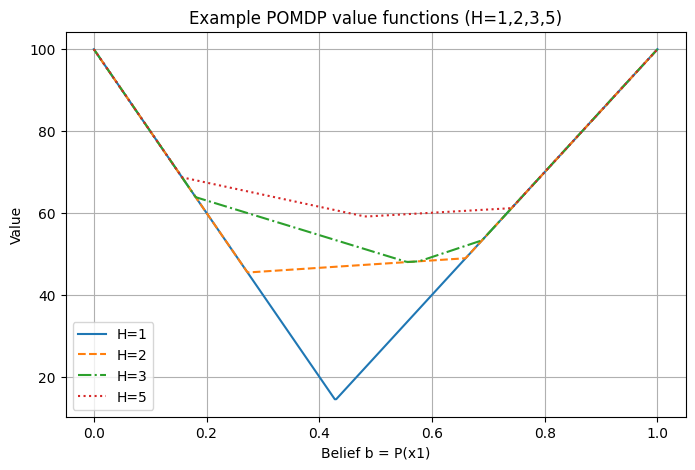

In [ ]:
# Build value functions for the textbook POMDP up to H = 5
bs, V = build_pomdp_value_functions(H_max=5)

# Inspect some beliefs
for b0 in [0.3, 0.5, 0.7]:
    print(f"b0 = {b0}")
    for H in [1, 2, 3, 5]:
        print("  H=", H, " V_H(b0)=", np.interp(b0, bs, V[H]))
    print()

# Plot H = 1,2,3,5
plt.figure(figsize=(8,5))
for H, style in zip([1,2,3,5], ['-', '--', '-.', ':']):
    plt.plot(bs, V[H], linestyle=style, label=f"H={H}")
plt.xlabel("Belief b = P(x1)")
plt.ylabel("Value")
plt.title("Example POMDP value functions (H=1,2,3,5)")
plt.legend()
plt.grid(True)
plt.show()


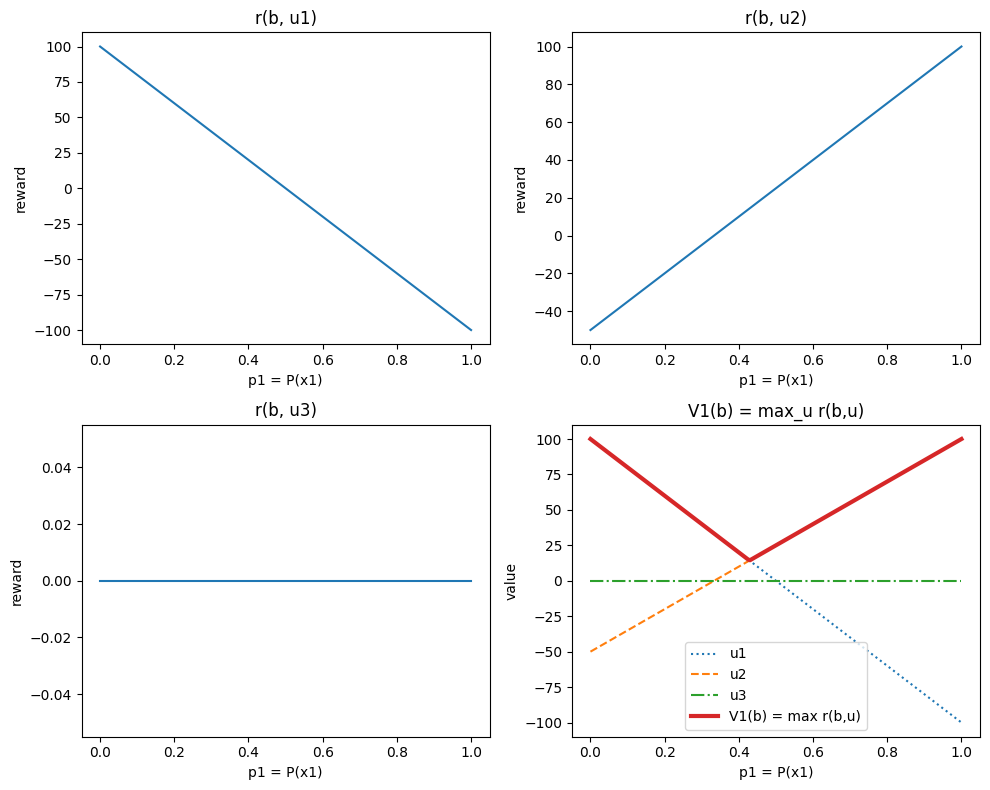

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Correct rewards from the diagram
r_u1_x1 = -100.0   # u1 in x1
r_u1_x2 = 100.0    # u1 in x2
r_u2_x1 = 100.0    # u2 in x1
r_u2_x2 = -50.0    # u2 in x2
r_u3_val = 0.0

def r_u1(b):
    b = np.array(b)
    return r_u1_x1 * b + r_u1_x2 * (1 - b)

def r_u2(b):
    b = np.array(b)
    return r_u2_x1 * b + r_u2_x2 * (1 - b)

def r_u3(b):
    b = np.array(b)
    return np.full_like(b, r_u3_val, dtype=float)

def V1(b):
    b = np.array(b)
    return np.maximum.reduce([r_u1(b), r_u2(b), r_u3(b)])

bs = np.linspace(0.0, 1.0, 201)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# (a) r(b,u1)
axs[0,0].plot(bs, r_u1(bs))
axs[0,0].set_title("r(b, u1)")
axs[0,0].set_xlabel("p1 = P(x1)")
axs[0,0].set_ylabel("reward")

# (b) r(b,u2)
axs[0,1].plot(bs, r_u2(bs))
axs[0,1].set_title("r(b, u2)")
axs[0,1].set_xlabel("p1 = P(x1)")
axs[0,1].set_ylabel("reward")

# (c) r(b,u3)
axs[1,0].plot(bs, r_u3(bs))
axs[1,0].set_title("r(b, u3)")
axs[1,0].set_xlabel("p1 = P(x1)")
axs[1,0].set_ylabel("reward")

# (d) V1(b) = max_u r(b,u)
axs[1,1].plot(bs, r_u1(bs), linestyle=":", label="u1")
axs[1,1].plot(bs, r_u2(bs), linestyle="--", label="u2")
axs[1,1].plot(bs, r_u3(bs), linestyle="-.", label="u3")
axs[1,1].plot(bs, V1(bs), linewidth=3, label="V1(b) = max r(b,u)")
axs[1,1].set_title("V1(b) = max_u r(b,u)")
axs[1,1].set_xlabel("p1 = P(x1)")
axs[1,1].set_ylabel("value")
axs[1,1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Grid is 3 rows x 4 columns (row 0 = top, col 0 = left)
# Rewards when ENTERING a state (quiz layout)
R = np.array([
    [ 1.0,  0.0,   0.0,   0.0],    # top row
    [ 0.0,  0.0,   0.0,   0.0],    # middle row
    [ 0.0,  0.0,  50.0, -100.0]    # bottom row (s33 = +50, s34 = -100)
])

# Actions: up, right, down, left
dirs = [(-1, 0),  # up
        ( 0, 1),  # right
        ( 1, 0),  # down
        ( 0,-1)]  # left

gamma = 1.0  # discount factor (quiz uses 1 for the 2-step part)


def value(h):
    """
    Finite-horizon optimal value function V_h for this MDP.

    V_h(s) = max_a E[ R(s') + gamma * V_{h-1}(s') ].
    """
    if h == 0:
        return np.zeros_like(R, dtype=float)

    # prev[s] = R(s) + gamma * V_{h-1}(s)
    prev = R + gamma * value(h - 1)

    def grab(i, j, d):
        """Return prev at the next state after moving in direction d,
        or staying put if we would hit a wall."""
        ni, nj = i + d[0], j + d[1]
        if 0 <= ni < R.shape[0] and 0 <= nj < R.shape[1]:
            return prev[ni, nj]
        else:
            return prev[i, j]  # collide with wall → stay

    V = np.zeros_like(R, dtype=float)

    for i in range(R.shape[0]):
        for j in range(R.shape[1]):
            best = -np.inf
            for k in range(len(dirs)):
                main = dirs[k]
                left = dirs[(k - 1) % 4]   # 90° left of intended
                right = dirs[(k + 1) % 4]  # 90° right of intended

                q = (
                    0.8 * grab(i, j, main) +
                    0.1 * grab(i, j, left) +
                    0.1 * grab(i, j, right)
                )
                best = max(best, q)

            V[i, j] = best

    return V


# Examples: one-step, two-step, three-step horizons
print("One-step horizon V1:\n", value(1), "\n")
print("Two-step horizon V2:\n", value(2), "\n")
print("Three-step horizon V3:\n", value(3), "\n")


One-step horizon V1:
 [[ 0.9  0.8  0.   0. ]
 [ 0.8  0.  40.   0. ]
 [ 0.  40.  30.  30. ]] 

Two-step horizon V2:
 [[ 1.79  1.6  32.08  0.  ]
 [ 1.6  36.08 64.   25.  ]
 [32.08 68.   61.   57.  ]] 

Three-step horizon V3:
 [[ 2.671 32.351 51.36  28.164]
 [32.351 60.96  94.908 46.9  ]
 [57.768 99.208 91.3   87.   ]] 

